### libray inclusion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score,roc_curve,recall_score,roc_auc_score,auc,confusion_matrix,cohen_kappa_score, f1_score, precision_score,matthews_corrcoef 
from tqdm import tqdm
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectPercentile, f_classif, chi2, SelectFromModel, SelectKBest
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Optional imports for preprocessing and visualization
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Set the display options to show all columns
pd.set_option('display.max_columns', None)

Radiomics Feature Analysis

In [3]:
Final_accuracy={}

In [4]:

df_rm = pd.read_csv("./Radiomics_Features_Train.csv")



df_rm .head()
print(df_rm.shape)


(4496, 1220)


In [5]:
df_rm['Malignancy'].value_counts()

0    3349
1    1147
Name: Malignancy, dtype: int64

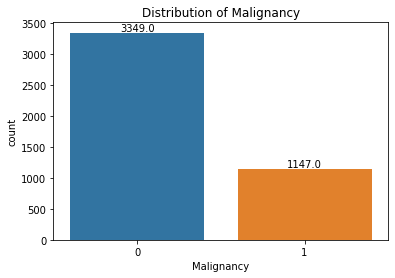

In [6]:
# If you want to order the bars by count, you can use the order parameter
order = df_rm['Malignancy'].value_counts().index
ax = sns.countplot(x='Malignancy', data=df_rm, order=order)

plt.title('Distribution of Malignancy')

# Annotate each bar with its count value
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

Radiomics Model Analysis with 1218 Features

In [7]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import joblib

# Load your dataset
df = pd.read_csv("./Radiomics_Features_Train.csv")

# Define features and target
X = df.drop(columns=['Patient_id', 'Malignancy'])
y = df['Malignancy']
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
# Use RandomOverSampler to oversample the minority class
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_std, y)

# Standardize the data


# Convert the resampled features and target back to DataFrame for ease of handling
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.Series(y_resampled, name='Malignancy')

# Combine the resampled features and target back into a DataFrame
df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Prepare data for cross-validation
X = df_resampled.drop(columns='Malignancy')
y = df_resampled['Malignancy']

# Define the number of folds (K)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
accuracy_scores = []
best_accuracy = 0
best_model = None

# Specify hyperparameters
rf_hyperparameters = {
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 200
}

# Split the dataset into K folds
for fold, (train_indices, test_indices) in enumerate(kf.split(X)):
    print(f"Fold {fold + 1}:")

    # Split the data into training and test sets for this fold
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

    # Train the model
    model = RandomForestClassifier(random_state=42, **rf_hyperparameters)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    #y_test = np.array(y_test).reshape(-1)
    #y_pred = np.array(y_pred).reshape(-1)
    #print(y_pred.shape,y_pred)
    # Ensure y_test and y_pred are 1-dimensional
    #y_test = y_test.ravel()
   # y_pred = y_pred.ravel()
    
    #print(y_test.shape,y_test)
    #y_test = y_test.values[:, -1]
    #y_pred = y_pred[:, -1]
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    # Check if current model is the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

    print("-" * 30)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save the best model
joblib.dump(best_model, 'best_random_forest_model_1218_features.pkl')

# Standardize the full dataset for making final predictions
X_standardized = scaler.transform(X)
y_pred_best = best_model.predict(X_standardized)

# Save predictions to a CSV file
df_predictions = pd.DataFrame({'True Label': y, 'Predicted Label': y_pred_best})
df_predictions.to_csv('predictions_1218.csv', index=False)
Final_accuracy['Accuracy with 1218 Features']=best_accuracy
# Calculate and print the average accuracy
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(best_accuracy)

Fold 1:
------------------------------
Accuracy: 0.9806
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       653
           1       0.99      0.98      0.98       687

    accuracy                           0.98      1340
   macro avg       0.98      0.98      0.98      1340
weighted avg       0.98      0.98      0.98      1340

Confusion Matrix:
 [[644   9]
 [ 17 670]]
Fold 2:
------------------------------
Accuracy: 0.9813
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       677
           1       0.98      0.98      0.98       663

    accuracy                           0.98      1340
   macro avg       0.98      0.98      0.98      1340
weighted avg       0.98      0.98      0.98      1340

Confusion Matrix:
 [[666  11]
 [ 14 649]]
Fold 3:
------------------------------
Accuracy: 0.9813
Classification Report:
               precisio

c:\Users\VIRUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Feature Selection 200

[0.00139522 0.00144726 0.00133106 ... 0.00072393 0.00089442 0.00082703]


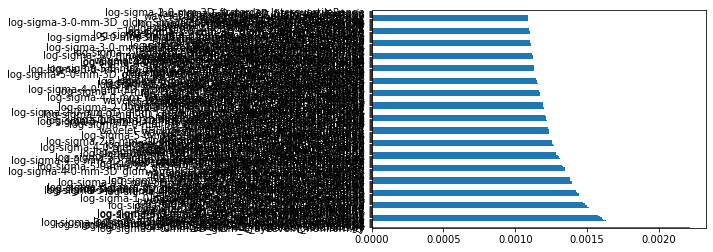

In [8]:
from sklearn.ensemble import ExtraTreesClassifier
Rm_df = pd.read_csv('./Radiomics_Features_Train.csv')
Rm_df.fillna(0, inplace=True)
# Separate features (X) and target variable (y)
df=Rm_df.drop(columns=['Patient_id'])
X = df.drop('Malignancy', axis=1)
y = df['Malignancy']

# Split the dataset into training and testing sets


# Standardize the data (important for PCA)
from sklearn.preprocessing import StandardScaler
X_standardized = StandardScaler().fit_transform(X)

model = ExtraTreesClassifier()
model.fit(X_standardized,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

feat_importances.nlargest(200).plot(kind='barh')
plt.show()

In [9]:

RM_200_top_feature_names=['log-sigma-5-0-mm-3D_firstorder_Range', 'wavelet-HLH_firstorder_TotalEnergy', 'log-sigma-2-0-mm-3D_glrlm_RunEntropy', 'original_shape_Maximum2DDiameterColumn', 'log-sigma-5-0-mm-3D_glrlm_RunVariance', 'log-sigma-4-0-mm-3D_firstorder_Skewness', 'wavelet-LLH_glrlm_ShortRunHighGrayLevelEmphasis', 'wavelet-LHL_gldm_DependenceNonUniformity', 'log-sigma-5-0-mm-3D_firstorder_InterquartileRange', 'original_shape_LeastAxisLength', 'log-sigma-3-0-mm-3D_firstorder_TotalEnergy', 'log-sigma-5-0-mm-3D_firstorder_MeanAbsoluteDeviation', 'log-sigma-3-0-mm-3D_glszm_LowGrayLevelZoneEmphasis', 'wavelet-LLH_firstorder_TotalEnergy', 'log-sigma-3-0-mm-3D_firstorder_Range', 'original_glrlm_GrayLevelNonUniformity', 'log-sigma-2-0-mm-3D_firstorder_TotalEnergy', 'wavelet-LHL_firstorder_TotalEnergy', 'log-sigma-2-0-mm-3D_gldm_LargeDependenceEmphasis', 'original_glrlm_RunEntropy', 'log-sigma-4-0-mm-3D_firstorder_RootMeanSquared', 'wavelet-LHL_glcm_DifferenceEntropy', 'wavelet-LHH_firstorder_TotalEnergy', 'log-sigma-4-0-mm-3D_glrlm_GrayLevelNonUniformity', 'log-sigma-2-0-mm-3D_firstorder_RobustMeanAbsoluteDeviation', 'log-sigma-4-0-mm-3D_glcm_Imc1', 'log-sigma-3-0-mm-3D_gldm_LargeDependenceEmphasis', 'log-sigma-2-0-mm-3D_firstorder_Skewness', 'log-sigma-1-0-mm-3D_firstorder_Energy', 'wavelet-LHL_glcm_Idmn', 'wavelet-LLL_firstorder_Minimum', 'wavelet-LLH_firstorder_Energy', 'log-sigma-5-0-mm-3D_glrlm_RunEntropy', 'wavelet-HLL_firstorder_MeanAbsoluteDeviation', 'log-sigma-3-0-mm-3D_glszm_HighGrayLevelZoneEmphasis', 'log-sigma-5-0-mm-3D_glszm_HighGrayLevelZoneEmphasis', 'log-sigma-2-0-mm-3D_glszm_GrayLevelNonUniformityNormalized', 'log-sigma-5-0-mm-3D_firstorder_Minimum', 'log-sigma-4-0-mm-3D_firstorder_RobustMeanAbsoluteDeviation', 'log-sigma-5-0-mm-3D_firstorder_RobustMeanAbsoluteDeviation', 'wavelet-LLL_glrlm_LongRunHighGrayLevelEmphasis', 'wavelet-HHH_glrlm_RunLengthNonUniformity', 'log-sigma-3-0-mm-3D_firstorder_Median', 'log-sigma-5-0-mm-3D_glrlm_RunLengthNonUniformityNormalized', 'log-sigma-5-0-mm-3D_firstorder_Kurtosis', 'wavelet-HHH_glrlm_LongRunLowGrayLevelEmphasis', 'log-sigma-5-0-mm-3D_glcm_Idm', 'wavelet-LLH_glrlm_ShortRunEmphasis', 'log-sigma-5-0-mm-3D_gldm_DependenceNonUniformityNormalized', 'original_shape_Maximum2DDiameterRow', 'wavelet-LLL_firstorder_Maximum', 'log-sigma-2-0-mm-3D_firstorder_10Percentile', 'original_shape_Flatness', 'log-sigma-5-0-mm-3D_firstorder_Variance', 'original_firstorder_TotalEnergy', 'log-sigma-2-0-mm-3D_firstorder_Energy', 'log-sigma-3-0-mm-3D_firstorder_90Percentile', 'original_shape_SurfaceVolumeRatio', 'log-sigma-3-0-mm-3D_firstorder_MeanAbsoluteDeviation', 'wavelet-LHL_glcm_Contrast', 'log-sigma-4-0-mm-3D_glszm_LargeAreaEmphasis', 'log-sigma-1-0-mm-3D_firstorder_Skewness', 'wavelet-HLL_glrlm_GrayLevelNonUniformity', 'wavelet-LHH_glszm_ZonePercentage', 'log-sigma-5-0-mm-3D_gldm_LargeDependenceEmphasis', 'wavelet-LLL_gldm_DependenceNonUniformity', 'log-sigma-4-0-mm-3D_firstorder_MeanAbsoluteDeviation', 'log-sigma-5-0-mm-3D_gldm_DependenceNonUniformity', 'log-sigma-2-0-mm-3D_glrlm_GrayLevelNonUniformityNormalized', 'wavelet-LLH_glcm_DifferenceAverage', 'wavelet-LLL_gldm_GrayLevelNonUniformity', 'log-sigma-3-0-mm-3D_firstorder_RootMeanSquared', 'wavelet-HLL_firstorder_Mean', 'log-sigma-4-0-mm-3D_glrlm_LongRunLowGrayLevelEmphasis', 'log-sigma-3-0-mm-3D_firstorder_Kurtosis', 'log-sigma-4-0-mm-3D_glcm_JointEnergy', 'original_shape_Maximum2DDiameterSlice', 'log-sigma-1-0-mm-3D_firstorder_90Percentile', 'log-sigma-1-0-mm-3D_firstorder_Kurtosis', 'wavelet-HLL_firstorder_InterquartileRange', 'wavelet-LLH_glrlm_LongRunHighGrayLevelEmphasis', 'log-sigma-2-0-mm-3D_firstorder_InterquartileRange', 'log-sigma-3-0-mm-3D_glszm_SmallAreaEmphasis', 'log-sigma-4-0-mm-3D_glrlm_LongRunEmphasis', 'log-sigma-2-0-mm-3D_firstorder_Median', 'log-sigma-4-0-mm-3D_glszm_GrayLevelNonUniformity', 'wavelet-HLL_firstorder_Energy', 'log-sigma-4-0-mm-3D_glcm_Correlation', 'original_firstorder_Minimum', 'wavelet-LHH_gldm_DependenceNonUniformity', 'wavelet-LLH_glcm_Idm', 'log-sigma-5-0-mm-3D_firstorder_Skewness', 'wavelet-LLH_glcm_Imc2', 'wavelet-LHL_glcm_MaximumProbability', 'wavelet-HHH_glrlm_GrayLevelNonUniformity', 'wavelet-HLH_glrlm_GrayLevelNonUniformity', 'log-sigma-4-0-mm-3D_firstorder_Median', 'wavelet-LLL_firstorder_Kurtosis', 'log-sigma-5-0-mm-3D_firstorder_90Percentile', 'log-sigma-4-0-mm-3D_firstorder_Kurtosis', 'wavelet-LHL_firstorder_Energy', 'log-sigma-3-0-mm-3D_glcm_DifferenceEntropy', 'wavelet-LLL_firstorder_Energy', 'log-sigma-5-0-mm-3D_glcm_MaximumProbability', 'log-sigma-4-0-mm-3D_firstorder_10Percentile', 'log-sigma-1-0-mm-3D_firstorder_RootMeanSquared', 'wavelet-LHL_glrlm_RunLengthNonUniformity', 'wavelet-LLH_glcm_Idn', 'log-sigma-5-0-mm-3D_glszm_GrayLevelVariance', 'original_glcm_Contrast', 'wavelet-HLL_firstorder_10Percentile', 'log-sigma-3-0-mm-3D_firstorder_Skewness', 'log-sigma-3-0-mm-3D_gldm_DependenceEntropy', 'wavelet-LLL_gldm_HighGrayLevelEmphasis', 'wavelet-HLL_firstorder_TotalEnergy', 'log-sigma-3-0-mm-3D_firstorder_Variance', 'log-sigma-3-0-mm-3D_glrlm_ShortRunHighGrayLevelEmphasis', 'log-sigma-5-0-mm-3D_glrlm_GrayLevelVariance', 'wavelet-LLL_firstorder_Variance', 'log-sigma-4-0-mm-3D_glszm_HighGrayLevelZoneEmphasis', 'wavelet-LLL_firstorder_TotalEnergy', 'log-sigma-1-0-mm-3D_firstorder_Maximum', 'log-sigma-4-0-mm-3D_glrlm_RunPercentage', 'log-sigma-1-0-mm-3D_glrlm_RunVariance', 'log-sigma-5-0-mm-3D_glszm_ZonePercentage', 'wavelet-LLH_glcm_InverseVariance', 'log-sigma-2-0-mm-3D_firstorder_MeanAbsoluteDeviation', 'wavelet-LHL_glcm_Idn', 'wavelet-LLH_firstorder_Range', 'log-sigma-1-0-mm-3D_glrlm_GrayLevelNonUniformityNormalized', 'wavelet-HLL_firstorder_Range', 'log-sigma-4-0-mm-3D_firstorder_Mean', 'log-sigma-5-0-mm-3D_firstorder_Maximum', 'original_firstorder_Range', 'log-sigma-4-0-mm-3D_glrlm_RunVariance', 'log-sigma-5-0-mm-3D_glszm_LargeAreaHighGrayLevelEmphasis', 'log-sigma-1-0-mm-3D_gldm_LargeDependenceLowGrayLevelEmphasis', 'log-sigma-2-0-mm-3D_glszm_SizeZoneNonUniformityNormalized', 'wavelet-LLH_firstorder_RobustMeanAbsoluteDeviation', 'log-sigma-5-0-mm-3D_glcm_Imc1', 'wavelet-LLH_glcm_Correlation', 'log-sigma-5-0-mm-3D_gldm_GrayLevelVariance', 'wavelet-LLL_glrlm_ShortRunLowGrayLevelEmphasis', 'log-sigma-4-0-mm-3D_gldm_SmallDependenceEmphasis', 'wavelet-HHH_glrlm_LongRunEmphasis', 'wavelet-LLL_firstorder_Range', 'log-sigma-3-0-mm-3D_firstorder_10Percentile', 'log-sigma-5-0-mm-3D_firstorder_Median', 'log-sigma-5-0-mm-3D_glcm_ClusterShade', 'log-sigma-1-0-mm-3D_gldm_LowGrayLevelEmphasis', 'original_firstorder_MeanAbsoluteDeviation', 'original_glrlm_ShortRunHighGrayLevelEmphasis', 'log-sigma-3-0-mm-3D_glcm_ClusterShade', 'log-sigma-5-0-mm-3D_glrlm_LongRunHighGrayLevelEmphasis', 'log-sigma-4-0-mm-3D_glszm_ZonePercentage', 'log-sigma-1-0-mm-3D_firstorder_Range', 'wavelet-LLL_firstorder_Skewness', 'log-sigma-3-0-mm-3D_firstorder_Mean', 'original_shape_Maximum3DDiameter', 'log-sigma-4-0-mm-3D_firstorder_InterquartileRange', 'original_shape_MinorAxisLength', 'wavelet-LLL_glrlm_HighGrayLevelRunEmphasis', 'wavelet-LLL_glrlm_ShortRunHighGrayLevelEmphasis', 'wavelet-LHL_gldm_GrayLevelNonUniformity', 'log-sigma-5-0-mm-3D_glrlm_LongRunLowGrayLevelEmphasis', 'log-sigma-3-0-mm-3D_firstorder_Minimum', 'log-sigma-5-0-mm-3D_gldm_SmallDependenceHighGrayLevelEmphasis', 'log-sigma-2-0-mm-3D_glrlm_RunLengthNonUniformityNormalized', 'log-sigma-2-0-mm-3D_firstorder_Variance', 'log-sigma-4-0-mm-3D_firstorder_Range', 'log-sigma-3-0-mm-3D_glcm_ClusterTendency', 'original_glcm_ClusterTendency', 'log-sigma-1-0-mm-3D_glszm_LargeAreaHighGrayLevelEmphasis', 'wavelet-HLL_firstorder_Variance', 'wavelet-LLH_firstorder_Maximum', 'log-sigma-3-0-mm-3D_glrlm_LongRunEmphasis', 'wavelet-LLH_firstorder_MeanAbsoluteDeviation', 'log-sigma-4-0-mm-3D_glrlm_GrayLevelNonUniformityNormalized', 'log-sigma-5-0-mm-3D_glszm_GrayLevelNonUniformity', 'log-sigma-1-0-mm-3D_firstorder_MeanAbsoluteDeviation', 'log-sigma-4-0-mm-3D_glszm_LargeAreaHighGrayLevelEmphasis', 'wavelet-LLH_gldm_GrayLevelNonUniformity', 'log-sigma-5-0-mm-3D_glcm_SumSquares', 'log-sigma-1-0-mm-3D_glrlm_LongRunHighGrayLevelEmphasis', 'log-sigma-4-0-mm-3D_gldm_LargeDependenceEmphasis', 'wavelet-LHL_glcm_DifferenceVariance', 'wavelet-LHL_glcm_ClusterProminence', 'log-sigma-5-0-mm-3D_glcm_InverseVariance', 'original_glrlm_ShortRunLowGrayLevelEmphasis', 'log-sigma-2-0-mm-3D_glrlm_HighGrayLevelRunEmphasis', 'log-sigma-1-0-mm-3D_glszm_LargeAreaEmphasis', 'log-sigma-1-0-mm-3D_firstorder_Minimum', 'log-sigma-1-0-mm-3D_glcm_ClusterTendency', 'log-sigma-3-0-mm-3D_firstorder_InterquartileRange', 'log-sigma-1-0-mm-3D_glcm_Idm', 'wavelet-HLH_gldm_GrayLevelNonUniformity', 'log-sigma-3-0-mm-3D_glrlm_GrayLevelVariance', 'original_glcm_SumEntropy', 'wavelet-LHL_glcm_Id', 'log-sigma-1-0-mm-3D_gldm_GrayLevelVariance']

X_200=df[RM_200_top_feature_names]



In [10]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import joblib

# Load your dataset
df = pd.read_csv("./Radiomics_Features_Train.csv")

# Define features and target
# Specify the feature names
X_200 = df[RM_200_top_feature_names]
y = df['Malignancy']

# Use RandomOverSampler to oversample the minority class
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_200, y)

# Standardize the data


# Convert the resampled features and target back to DataFrame for ease of handling
X_resampled_df = pd.DataFrame(X_resampled, columns=RM_200_top_feature_names)
y_resampled_df = pd.Series(y_resampled, name='Malignancy')

# Combine the resampled features and target back into a DataFrame
df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Prepare data for cross-validation
X = df_resampled.drop(columns='Malignancy')
y = df_resampled['Malignancy']

# Define the number of folds (K)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
accuracy_scores = []
best_accuracy = 0
best_model = None

# Specify hyperparameters
rf_hyperparameters = {
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 200
}

# Split the dataset into K folds
for fold, (train_indices, test_indices) in enumerate(kf.split(X)):
    print(f"Fold {fold + 1}:")
    
    # Split the data into training and test sets for this fold
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
    
    # Train the model
    model = RandomForestClassifier(random_state=42, **rf_hyperparameters)
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    # Check if current model is the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

    print("-" * 30)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save the best model

joblib.dump(best_model, 'best_random_forest_model_200_features.pkl')
# Standardize the full dataset for making final predictions
#X_standardized = scaler.transform(X_200)
y_pred_best = best_model.predict(X_200)

# Save predictions to a CSV file
Final_accuracy['Accuracy with 200 Features']=best_accuracy

# Calculate and print the average accuracy
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f"Average Accuracy: {avg_accuracy:.4f}")


Fold 1:
------------------------------
Accuracy: 0.9866
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       653
           1       0.99      0.99      0.99       687

    accuracy                           0.99      1340
   macro avg       0.99      0.99      0.99      1340
weighted avg       0.99      0.99      0.99      1340

Confusion Matrix:
 [[643  10]
 [  8 679]]
Fold 2:
------------------------------
Accuracy: 0.9896
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       677
           1       0.99      0.99      0.99       663

    accuracy                           0.99      1340
   macro avg       0.99      0.99      0.99      1340
weighted avg       0.99      0.99      0.99      1340

Confusion Matrix:
 [[668   9]
 [  5 658]]
Fold 3:
------------------------------
Accuracy: 0.9888
Classification Report:
               precisio

Radiomics Model with 100 

In [11]:
RM_100_top_feature_names=['log-sigma-5-0-mm-3D_firstorder_Range', 'wavelet-HLH_firstorder_TotalEnergy', 'log-sigma-2-0-mm-3D_glrlm_RunEntropy', 'original_shape_Maximum2DDiameterColumn', 'log-sigma-5-0-mm-3D_glrlm_RunVariance', 'log-sigma-4-0-mm-3D_firstorder_Skewness', 'wavelet-LLH_glrlm_ShortRunHighGrayLevelEmphasis', 'wavelet-LHL_gldm_DependenceNonUniformity', 'log-sigma-5-0-mm-3D_firstorder_InterquartileRange', 'original_shape_LeastAxisLength', 'log-sigma-3-0-mm-3D_firstorder_TotalEnergy', 'log-sigma-5-0-mm-3D_firstorder_MeanAbsoluteDeviation', 'log-sigma-3-0-mm-3D_glszm_LowGrayLevelZoneEmphasis', 'wavelet-LLH_firstorder_TotalEnergy', 'log-sigma-3-0-mm-3D_firstorder_Range', 'original_glrlm_GrayLevelNonUniformity', 'log-sigma-2-0-mm-3D_firstorder_TotalEnergy', 'wavelet-LHL_firstorder_TotalEnergy', 'log-sigma-2-0-mm-3D_gldm_LargeDependenceEmphasis', 'original_glrlm_RunEntropy', 'log-sigma-4-0-mm-3D_firstorder_RootMeanSquared', 'wavelet-LHL_glcm_DifferenceEntropy', 'wavelet-LHH_firstorder_TotalEnergy', 'log-sigma-4-0-mm-3D_glrlm_GrayLevelNonUniformity', 'log-sigma-2-0-mm-3D_firstorder_RobustMeanAbsoluteDeviation', 'log-sigma-4-0-mm-3D_glcm_Imc1', 'log-sigma-3-0-mm-3D_gldm_LargeDependenceEmphasis', 'log-sigma-2-0-mm-3D_firstorder_Skewness', 'log-sigma-1-0-mm-3D_firstorder_Energy', 'wavelet-LHL_glcm_Idmn', 'wavelet-LLL_firstorder_Minimum', 'wavelet-LLH_firstorder_Energy', 'log-sigma-5-0-mm-3D_glrlm_RunEntropy', 'wavelet-HLL_firstorder_MeanAbsoluteDeviation', 'log-sigma-3-0-mm-3D_glszm_HighGrayLevelZoneEmphasis', 'log-sigma-5-0-mm-3D_glszm_HighGrayLevelZoneEmphasis', 'log-sigma-2-0-mm-3D_glszm_GrayLevelNonUniformityNormalized', 'log-sigma-5-0-mm-3D_firstorder_Minimum', 'log-sigma-4-0-mm-3D_firstorder_RobustMeanAbsoluteDeviation', 'log-sigma-5-0-mm-3D_firstorder_RobustMeanAbsoluteDeviation', 'wavelet-LLL_glrlm_LongRunHighGrayLevelEmphasis', 'wavelet-HHH_glrlm_RunLengthNonUniformity', 'log-sigma-3-0-mm-3D_firstorder_Median', 'log-sigma-5-0-mm-3D_glrlm_RunLengthNonUniformityNormalized', 'log-sigma-5-0-mm-3D_firstorder_Kurtosis', 'wavelet-HHH_glrlm_LongRunLowGrayLevelEmphasis', 'log-sigma-5-0-mm-3D_glcm_Idm', 'wavelet-LLH_glrlm_ShortRunEmphasis', 'log-sigma-5-0-mm-3D_gldm_DependenceNonUniformityNormalized', 'original_shape_Maximum2DDiameterRow', 'wavelet-LLL_firstorder_Maximum', 'log-sigma-2-0-mm-3D_firstorder_10Percentile', 'original_shape_Flatness', 'log-sigma-5-0-mm-3D_firstorder_Variance', 'original_firstorder_TotalEnergy', 'log-sigma-2-0-mm-3D_firstorder_Energy', 'log-sigma-3-0-mm-3D_firstorder_90Percentile', 'original_shape_SurfaceVolumeRatio', 'log-sigma-3-0-mm-3D_firstorder_MeanAbsoluteDeviation', 'wavelet-LHL_glcm_Contrast', 'log-sigma-4-0-mm-3D_glszm_LargeAreaEmphasis', 'log-sigma-1-0-mm-3D_firstorder_Skewness', 'wavelet-HLL_glrlm_GrayLevelNonUniformity', 'wavelet-LHH_glszm_ZonePercentage', 'log-sigma-5-0-mm-3D_gldm_LargeDependenceEmphasis', 'wavelet-LLL_gldm_DependenceNonUniformity', 'log-sigma-4-0-mm-3D_firstorder_MeanAbsoluteDeviation', 'log-sigma-5-0-mm-3D_gldm_DependenceNonUniformity', 'log-sigma-2-0-mm-3D_glrlm_GrayLevelNonUniformityNormalized', 'wavelet-LLH_glcm_DifferenceAverage', 'wavelet-LLL_gldm_GrayLevelNonUniformity', 'log-sigma-3-0-mm-3D_firstorder_RootMeanSquared', 'wavelet-HLL_firstorder_Mean', 'log-sigma-4-0-mm-3D_glrlm_LongRunLowGrayLevelEmphasis', 'log-sigma-3-0-mm-3D_firstorder_Kurtosis', 'log-sigma-4-0-mm-3D_glcm_JointEnergy', 'original_shape_Maximum2DDiameterSlice', 'log-sigma-1-0-mm-3D_firstorder_90Percentile', 'log-sigma-1-0-mm-3D_firstorder_Kurtosis', 'wavelet-HLL_firstorder_InterquartileRange', 'wavelet-LLH_glrlm_LongRunHighGrayLevelEmphasis', 'log-sigma-2-0-mm-3D_firstorder_InterquartileRange', 'log-sigma-3-0-mm-3D_glszm_SmallAreaEmphasis', 'log-sigma-4-0-mm-3D_glrlm_LongRunEmphasis', 'log-sigma-2-0-mm-3D_firstorder_Median', 'log-sigma-4-0-mm-3D_glszm_GrayLevelNonUniformity', 'wavelet-HLL_firstorder_Energy', 'log-sigma-4-0-mm-3D_glcm_Correlation', 'original_firstorder_Minimum', 'wavelet-LHH_gldm_DependenceNonUniformity', 'wavelet-LLH_glcm_Idm', 'log-sigma-5-0-mm-3D_firstorder_Skewness', 'wavelet-LLH_glcm_Imc2', 'wavelet-LHL_glcm_MaximumProbability', 'wavelet-HHH_glrlm_GrayLevelNonUniformity', 'wavelet-HLH_glrlm_GrayLevelNonUniformity', 'log-sigma-4-0-mm-3D_firstorder_Median', 'wavelet-LLL_firstorder_Kurtosis', 'log-sigma-5-0-mm-3D_firstorder_90Percentile', 'log-sigma-4-0-mm-3D_firstorder_Kurtosis']

X_100=df[RM_100_top_feature_names]

In [12]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import joblib

# Load your dataset
df = pd.read_csv("./Radiomics_Features_Train.csv")

# Define features and target
# Specify the feature names
X_100 = df[RM_100_top_feature_names]
y = df['Malignancy']

# Use RandomOverSampler to oversample the minority class
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_100, y)

# Standardize the data


# Convert the resampled features and target back to DataFrame for ease of handling
X_resampled_df = pd.DataFrame(X_resampled, columns=RM_100_top_feature_names)
y_resampled_df = pd.Series(y_resampled, name='Malignancy')

# Combine the resampled features and target back into a DataFrame
df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Prepare data for cross-validation
X = df_resampled.drop(columns='Malignancy')
y = df_resampled['Malignancy']

# Define the number of folds (K)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
accuracy_scores = []
best_accuracy = 0
best_model = None

# Specify hyperparameters
rf_hyperparameters = {
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 200
}

# Split the dataset into K folds
for fold, (train_indices, test_indices) in enumerate(kf.split(X)):
    print(f"Fold {fold + 1}:")
    
    # Split the data into training and test sets for this fold
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
    
    # Train the model
    model = RandomForestClassifier(random_state=42, **rf_hyperparameters)
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    # Check if current model is the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

    print("-" * 30)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save the best model

joblib.dump(best_model, 'best_random_forest_model_100_features.pkl')
# Standardize the full dataset for making final predictions
#X_standardized = scaler.transform(X_200)
y_pred_best = best_model.predict(X_100)

# Save predictions to a CSV file
Final_accuracy['Accuracy with 100 Features']=best_accuracy

# Calculate and print the average accuracy
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f"Average Accuracy: {avg_accuracy:.4f}")

Fold 1:
------------------------------
Accuracy: 0.9873
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       653
           1       0.99      0.99      0.99       687

    accuracy                           0.99      1340
   macro avg       0.99      0.99      0.99      1340
weighted avg       0.99      0.99      0.99      1340

Confusion Matrix:
 [[645   8]
 [  9 678]]
Fold 2:
------------------------------
Accuracy: 0.9910
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       677
           1       0.99      0.99      0.99       663

    accuracy                           0.99      1340
   macro avg       0.99      0.99      0.99      1340
weighted avg       0.99      0.99      0.99      1340

Confusion Matrix:
 [[670   7]
 [  5 658]]
Fold 3:
------------------------------
Accuracy: 0.9896
Classification Report:
               precisio

In [13]:
Final_accuracy

{'Accuracy with 1218 Features': 0.9813432835820896,
 'Accuracy with 200 Features': 0.9895522388059701,
 'Accuracy with 100 Features': 0.991044776119403}

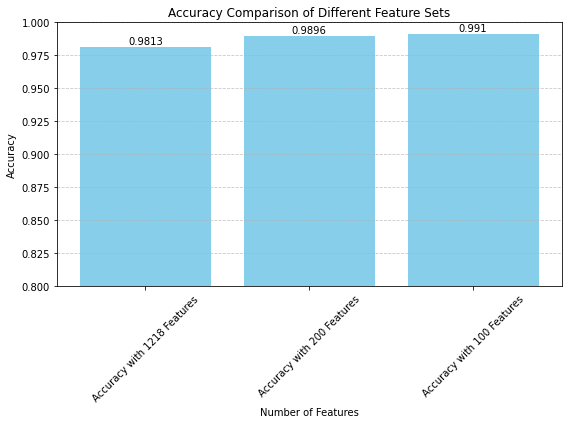

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Your data
data = Final_accuracy

# Extract model names and corresponding accuracies for each scenario
# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(data.keys(), data.values(), color='skyblue')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Feature Sets')
plt.ylim(0.8, 1)  # Set y-axis limits for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adding labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.001, round(yval, 4), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [15]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, Input
import os
import datetime
import tensorflow as tf
import joblib
import SimpleITK as sitk
import numpy as np
from radiomics import featureextractor,imageoperations
import os
import pandas as pd
from pandas import DataFrame as DF
import warnings
import time
from time import sleep
from tqdm import tqdm
from skimage import measure

In [16]:
Final_accuracy_test={}

In [17]:
import datetime

# Get the current date
current_date = datetime.date.today()

# Format the date as a string in the desired format
current_date = current_date.strftime("%Y-%m-%d")
current_date

'2024-06-09'

In [18]:
Test_Data="./Radiomics_Features_Test.csv"
Test_Data

'./Radiomics_Features_Test.csv'

In [19]:
test_df=pd.read_csv(Test_Data)

#from sklearn.preprocessing import StandardScaler
#X_standardized = StandardScaler().fit_transform(Rm_200)
test_df

original_shape_Elongation  original_shape_Flatness  \
0                      0.439437                 0.224163   
1                      0.786660                 0.682031   
2                      0.835456                 0.710542   
3                      0.151523                 0.083362   
4                      0.789329                 0.708324   
...                         ...                      ...   
1119                   0.626825                 0.472233   
1120                   0.782690                 0.602526   
1121                   0.560449                 0.448247   
1122                   0.832679                 0.719895   
1123                   0.895353                 0.718231   

      original_shape_LeastAxisLength  original_shape_MajorAxisLength  \
0                           6.850633                       30.560968   
1                           4.569188                        6.699385   
2                           7.379085                       10.385145   
3                           5.114990                       61.358842   
4                          10.954644                       15.465573   
...                              ...                             ...   
1119                        5.635883                       11.934549   
1120                        3.300095                        5.477101   
1121                        4.613611                       10.292567   
1122                        9.013721                       12.520890   
1123                        4.267780                        5.942068   

      original_shape_Maximum2DDiameterColumn  \
0                                  32.388269   
1                                   7.280110   
2                                  11.661904   
3                                   8.944272   
4                                  16.492422   
...                                      ...   
1119                               12.041595   
1120                                6.082763   
1121                               12.165525   
1122                               14.422205   
1123                                6.403124   

      original_shape_Maximum2DDiameterRow  \
0                               28.460499   
1                                6.082763   
2                               10.198039   
3                                8.944272   
4                               18.027756   
...                                   ...   
1119                            10.295630   
1120                             6.324555   
1121                            12.649111   
1122                            14.560220   
1123                             7.071068   

      original_shape_Maximum2DDiameterSlice  original_shape_Maximum3DDiameter  \
0                                 17.464249                         35.735137   
1                                  8.062258                          8.062258   
2                                 11.180340                         12.041595   
3                                  7.615773                         37.229021   
4                                 17.000000                         18.708287   
...                                     ...                               ...   
1119                               9.433981                         13.784049   
1120                               5.000000                          6.324555   
1121                               7.211103                         12.806248   
1122                              12.529964                         14.866069   
1123                               7.280110                          7.280110   

      original_shape_MeshVolume  original_shape_MinorAxisLength  \
0                   1113.791667                       13.429609   
1                    101.750000                        5.270139   
2                    459.375000                        8.676328   
3                    175.333333                        9.2972

Radiomics Model with 1218 Features

In [20]:
import pandas as pd
import joblib

# Load the saved model
model = joblib.load('./best_random_forest_model_1218_features.pkl')

# Load the test dataset


# Assuming you've already preprocessed your test data similarly to the training data
X_test = test_df.drop(columns=['Patient_id','Malignancy'])

scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)
# Make predictions on the test set
y_pred_best = model.predict(X_test)

# Evaluate the performance of the model using appropriate metrics

print(y_pred_best)

[0 0 0 ... 0 0 0]


c:\Users\VIRUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [21]:

y_test_p=pd.DataFrame(y_pred_best)
y_test_p['Image File']=test_df['Patient_id']
Pr_file=f"test_{current_date}_1218.csv"
y_test_p.to_csv(Pr_file)

In [22]:
import pandas as pd

# Read the CSV files
try:
    radiomics_df = pd.read_csv('./Radiomics_Feature.csv')
    example_df = pd.read_csv(Pr_file)
except FileNotFoundError as e:
    print(f"Error: {e}")
    exit()

# Print the first few rows of the dataframes to check the structure


# Merge the dataframes based on the patient_id and Image File columns
try:
    merged_df = pd.merge(example_df, radiomics_df, left_on='Image File', right_on='Patient_id', how='left')
    #print(merged_df.head())
except KeyError as e:
    print(f"Error: {e}")
    exit()

# Select relevant columns, assuming you want to keep all columns from example_df and add Malignancy
y_test = merged_df[['Malignancy']]




In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_best)
report = classification_report(y_test, y_pred_best)
conf_matrix = confusion_matrix(y_test, y_pred_best)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
Final_accuracy_test['1218 Features']=accuracy

Accuracy: 0.9092526690391459
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       868
           1       0.94      0.64      0.76       256

    accuracy                           0.91      1124
   macro avg       0.92      0.82      0.85      1124
weighted avg       0.91      0.91      0.90      1124

Confusion Matrix:
 [[857  11]
 [ 91 165]]


200 Features

In [24]:
import pandas as pd
import joblib

# Load the saved model
model = joblib.load('./best_random_forest_model_200_features.pkl')

# Load the test dataset


# Assuming you've already preprocessed your test data similarly to the training data
X_test = test_df[RM_200_top_feature_names]

# Make predictions on the test set
y_pred_best = model.predict(X_test)

# Evaluate the performance of the model using appropriate metrics

print(y_pred_best)
y_test_p=pd.DataFrame(y_pred_best)
y_test_p['Image File']=test_df['Patient_id']
Pr_file=f"test_{current_date}_200.csv"
y_test_p.to_csv(Pr_file)

[0 0 0 ... 0 0 0]


In [25]:
import pandas as pd

# Read the CSV files
try:
    radiomics_df = pd.read_csv('./Radiomics_Feature.csv')
    example_df = pd.read_csv(Pr_file)
except FileNotFoundError as e:
    print(f"Error: {e}")
    exit()

# Print the first few rows of the dataframes to check the structure


# Merge the dataframes based on the patient_id and Image File columns
try:
    merged_df = pd.merge(example_df, radiomics_df, left_on='Image File', right_on='Patient_id', how='left')
    #print(merged_df.head())
except KeyError as e:
    print(f"Error: {e}")
    exit()

# Select relevant columns, assuming you want to keep all columns from example_df and add Malignancy
y_test = merged_df[['Malignancy']]

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_best)
report = classification_report(y_test, y_pred_best)
conf_matrix = confusion_matrix(y_test, y_pred_best)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
Final_accuracy_test['200 Features']=accuracy

Accuracy: 0.9688612099644128
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       868
           1       0.94      0.93      0.93       256

    accuracy                           0.97      1124
   macro avg       0.96      0.95      0.96      1124
weighted avg       0.97      0.97      0.97      1124

Confusion Matrix:
 [[852  16]
 [ 19 237]]


100 Features

In [27]:
import pandas as pd
import joblib

# Load the saved model
model = joblib.load('./best_random_forest_model_100_features.pkl')

# Load the test dataset


# Assuming you've already preprocessed your test data similarly to the training data
X_test = test_df[RM_100_top_feature_names]

# Make predictions on the test set
y_pred_best = model.predict(X_test)

# Evaluate the performance of the model using appropriate metrics

print(y_pred_best)
y_test_p=pd.DataFrame(y_pred_best)
y_test_p['Image File']=test_df['Patient_id']
Pr_file=f"test_{current_date}_200.csv"
y_test_p.to_csv(Pr_file)

[0 0 0 ... 0 0 0]


In [28]:
import pandas as pd

# Read the CSV files
try:
    radiomics_df = pd.read_csv('./Radiomics_Feature.csv')
    example_df = pd.read_csv(Pr_file)
except FileNotFoundError as e:
    print(f"Error: {e}")
    exit()

# Print the first few rows of the dataframes to check the structure


# Merge the dataframes based on the patient_id and Image File columns
try:
    merged_df = pd.merge(example_df, radiomics_df, left_on='Image File', right_on='Patient_id', how='left')
    #print(merged_df.head())
except KeyError as e:
    print(f"Error: {e}")
    exit()

# Select relevant columns, assuming you want to keep all columns from example_df and add Malignancy
y_test = merged_df[['Malignancy']]

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_best)
report = classification_report(y_test, y_pred_best)
conf_matrix = confusion_matrix(y_test, y_pred_best)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
Final_accuracy_test['100 Features']=accuracy

Accuracy: 0.9661921708185054
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       868
           1       0.95      0.90      0.92       256

    accuracy                           0.97      1124
   macro avg       0.96      0.94      0.95      1124
weighted avg       0.97      0.97      0.97      1124

Confusion Matrix:
 [[855  13]
 [ 25 231]]


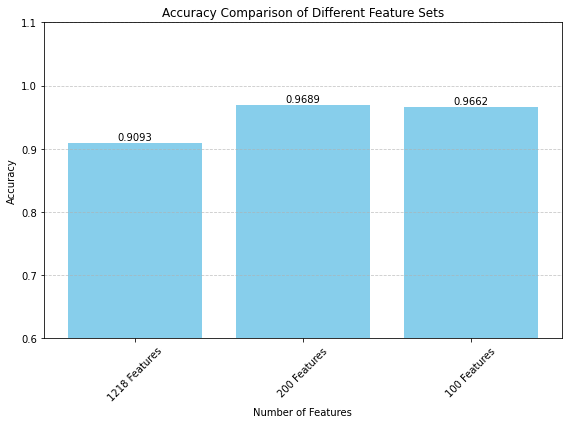

In [30]:
data = Final_accuracy_test

# Extract model names and corresponding accuracies for each scenario
# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(data.keys(), data.values(), color='skyblue')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Feature Sets')
plt.ylim(0.6, 1.1)  # Set y-axis limits for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adding labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.001, round(yval, 4), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [31]:
test_df=pd.read_csv('./Radiomics_Feature.csv')
Final_accuracy_test_1={}

In [32]:
import pandas as pd
import joblib

# Load the saved model
model = joblib.load('./best_random_forest_model_200_features.pkl')

# Load the test dataset


# Assuming you've already preprocessed your test data similarly to the training data


X_test = test_df[RM_200_top_feature_names]
# Make predictions on the test set
y_pred_best_2 = model.predict(X_test)

# Evaluate the performance of the model using appropriate metrics

print(y_pred_best_2)

y_test_p=pd.DataFrame(y_pred_best_2)
y_test_p['Image File']=test_df['Patient_id']
Pr_file=f"test_{current_date}_200_a1.csv"
y_test_p.to_csv(Pr_file)
import pandas as pd

# Read the CSV files
try:
    radiomics_df = pd.read_csv('./Radiomics_Feature.csv')
    example_df = pd.read_csv(Pr_file)
except FileNotFoundError as e:
    print(f"Error: {e}")
    exit()

# Print the first few rows of the dataframes to check the structure


# Merge the dataframes based on the patient_id and Image File columns
try:
    merged_df = pd.merge(example_df, radiomics_df, left_on='Image File', right_on='Patient_id', how='left')
    #print(merged_df.head())
except KeyError as e:
    print(f"Error: {e}")
    exit()

# Select relevant columns, assuming you want to keep all columns from example_df and add Malignancy
y_test = merged_df[['Malignancy']]
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_best_2)
report = classification_report(y_test, y_pred_best_2)
conf_matrix = confusion_matrix(y_test, y_pred_best_2)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
Final_accuracy_test_1['200 Features']=accuracy


[1 1 1 ... 0 0 0]
Accuracy: 0.9914590747330961
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4217
           1       0.98      0.98      0.98      1403

    accuracy                           0.99      5620
   macro avg       0.99      0.99      0.99      5620
weighted avg       0.99      0.99      0.99      5620

Confusion Matrix:
 [[4192   25]
 [  23 1380]]


In [33]:
import pandas as pd
import joblib

# Load the saved model
model = joblib.load('./best_random_forest_model_100_features.pkl')

# Load the test dataset


# Assuming you've already preprocessed your test data similarly to the training data


X_test = test_df[RM_100_top_feature_names]
# Make predictions on the test set
y_pred_best_3 = model.predict(X_test)

# Evaluate the performance of the model using appropriate metrics

print(y_pred_best_3)

y_test_p=pd.DataFrame(y_pred_best_3)
y_test_p['Image File']=test_df['Patient_id']
Pr_file=f"test_{current_date}_200_a1.csv"
y_test_p.to_csv(Pr_file)
import pandas as pd

# Read the CSV files
try:
    radiomics_df = pd.read_csv('./Radiomics_Feature.csv')
    example_df = pd.read_csv(Pr_file)
except FileNotFoundError as e:
    print(f"Error: {e}")
    exit()

# Print the first few rows of the dataframes to check the structure


# Merge the dataframes based on the patient_id and Image File columns
try:
    merged_df = pd.merge(example_df, radiomics_df, left_on='Image File', right_on='Patient_id', how='left')
    #print(merged_df.head())
except KeyError as e:
    print(f"Error: {e}")
    exit()

# Select relevant columns, assuming you want to keep all columns from example_df and add Malignancy
y_test = merged_df[['Malignancy']]
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_best_3)
report = classification_report(y_test, y_pred_best_3)
conf_matrix = confusion_matrix(y_test, y_pred_best_3)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
Final_accuracy_test_1['100 Features']=accuracy

[1 1 1 ... 0 0 0]
Accuracy: 0.9912811387900355
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4217
           1       0.99      0.98      0.98      1403

    accuracy                           0.99      5620
   macro avg       0.99      0.99      0.99      5620
weighted avg       0.99      0.99      0.99      5620

Confusion Matrix:
 [[4197   20]
 [  29 1374]]


In [34]:
import pandas as pd
import joblib

# Load the saved model
model = joblib.load('./best_random_forest_model_1218_features.pkl')

# Load the test dataset


# Assuming you've already preprocessed your test data similarly to the training data
X_test = test_df.drop(columns=['Patient_id','Malignancy'])

scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)
# Make predictions on the test set
y_pred_best_1 = model.predict(X_test)

# Evaluate the performance of the model using appropriate metrics

print(y_pred_best_1)

y_test_p=pd.DataFrame(y_pred_best_1)
y_test_p['Image File']=test_df['Patient_id']
Pr_file=f"test_{current_date}_200_a.csv"
y_test_p.to_csv(Pr_file)
import pandas as pd

# Read the CSV files
try:
    radiomics_df = pd.read_csv('./Radiomics_Feature.csv')
    example_df = pd.read_csv(Pr_file)
except FileNotFoundError as e:
    print(f"Error: {e}")
    exit()

# Print the first few rows of the dataframes to check the structure


# Merge the dataframes based on the patient_id and Image File columns
try:
    merged_df = pd.merge(example_df, radiomics_df, left_on='Image File', right_on='Patient_id', how='left')
    #print(merged_df.head())
except KeyError as e:
    print(f"Error: {e}")
    exit()

# Select relevant columns, assuming you want to keep all columns from example_df and add Malignancy
y_test = merged_df[['Malignancy']]
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_best_1)
report = classification_report(y_test, y_pred_best_1)
conf_matrix = confusion_matrix(y_test, y_pred_best_1)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
Final_accuracy_test_1['1218 Features']=accuracy

c:\Users\VIRUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[1 1 1 ... 0 0 0]
Accuracy: 0.9816725978647687
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      4217
           1       0.98      0.95      0.96      1403

    accuracy                           0.98      5620
   macro avg       0.98      0.97      0.98      5620
weighted avg       0.98      0.98      0.98      5620

Confusion Matrix:
 [[4188   29]
 [  74 1329]]


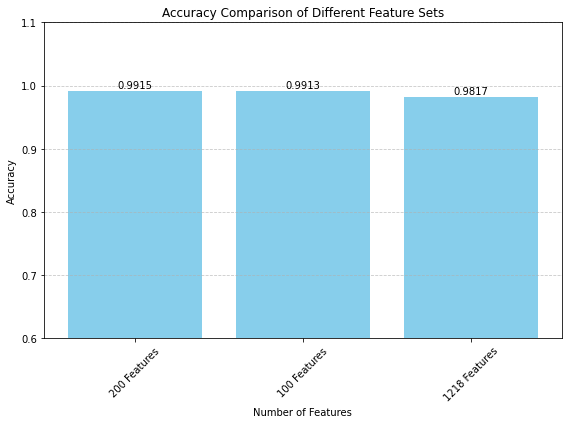

In [35]:
data = Final_accuracy_test_1

# Extract model names and corresponding accuracies for each scenario
# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(data.keys(), data.values(), color='skyblue')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Feature Sets')
plt.ylim(0.6, 1.1)  # Set y-axis limits for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adding labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.001, round(yval, 4), ha='center', va='bottom')

plt.tight_layout()
plt.show()